1- book ---> list that contain each words of one book after split

2- books ---> list that contain lists , each of them contain words of each book after split

3- vocab----->  conrain all words without redundancy

4- paragraphs ------> contain each words with redundancy 

5- b_count -----> number of books in the list

6- w_ -----> number of words in one book 

#import libraries

In [2]:
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

!pip install wordcloud
import wordcloud
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import classification_report,plot_confusion_matrix
from sklearn import tree
import nltk
import re
import random
from nltk.corpus import gutenberg,stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import graphviz
from sklearn.svm import SVC

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import nltk
from nltk.collocations import *
from sklearn.metrics import  ConfusionMatrixDisplay, confusion_matrix
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Data preperation
import gensim
from gensim.corpora import Dictionary

# Models
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# use to find bigrams, which are pairs of words
from nltk.collocations import BigramCollocationFinder,TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures,TrigramAssocMeasures
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import  ConfusionMatrixDisplay, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

nltk.download("gutenberg")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopset = set(stopwords.words('english'))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


#Read_books

In [3]:
def read_books(urls):
  import requests
  books = []
  for u in urls:
    res = requests.get(u, allow_redirects=True)
    #allow ->>>> if true allow post/put/delete
    if(res.status_code==404):
      raise Exception('Please Enter a valid URL. ' + u + ' does not exist!')
      return
    res.encoding = 'utf-8-sig'
    #making encoding(تشفير علشان لو فى حروف مشوشه ما يحصلشى error ) 
    book = res.text
    book = list(book.split())
    books.append(book)
  return books 

#preprocessing

In [4]:
def clean_books(books):
  nltk.download('stopwords')
  stop_words = stopwords.words('english')
  ps = PorterStemmer()
  b_count = len(books)
  for b_indx in range(b_count):
    w_count = len(books[b_indx])
    for w_indx in range(w_count):
      books[b_indx][w_indx] = (''.join(re.findall('\w', books[b_indx][w_indx]))).lower()
  for b_indx in range(b_count):
    books[b_indx] = [ps.stem(wrd) for wrd in books[b_indx] if wrd!='' and wrd not in stop_words]
    #remove the stopworks and then return the original word using porter stemmer 

In [5]:
# from nltk.stem import PorterStemmer
# ps = PorterStemmer()
# ps.stem("programming")

In [6]:
def random_indx_list(num_pragraphs, paragraph_len, book_lngth):
  import random
  indx = []
  for i in range(0,num_pragraphs):
    n = random.randint(1, book_lngth - paragraph_len - 1)
    indx.append(n)
  return indx

In [7]:
def get_columns(books, authors, num_pragraphs, paragraph_len):
  paragraphs = []
  for book in books:
    indx = random_indx_list(num_pragraphs, paragraph_len, len(book))
    for i in indx:
      paragraphs.append(book[i:i+100])

  names = []
  for i in range(len(books)):
    for j in range(num_pragraphs):
      names.append(authors[i])
  
  return paragraphs, names

In [8]:
def serialize(paragraphs, names):
  import pandas as pd
  df = pd.DataFrame()
  df['words'] = paragraphs
  df['book_name'] = names
  return df

In [9]:
def get_vocab(books):
  vocab = []
  for book in books:
    vocab.extend(book)
    #  take values from book to vocab list
    vocab = list(set(vocab))
    # to prevent redundancy
  return vocab

In [10]:
def get_data(urls, authors, num_pragraphs=200, paragraph_len=100):
  if len(urls) != len(authors):
    e = "Number of authors doesn't number of books"
    return e, e
  try:
    books = read_books(urls)
  except Exception as e:
    return e, e
  clean_books(books)
  paragraphs, names = get_columns(books, authors, num_pragraphs, paragraph_len)
  df = serialize(paragraphs, names)
  vocab = get_vocab(books)
  return df, vocab,paragraphs

In [11]:
urls = ['https://www.gutenberg.org/cache/epub/68063/pg68063.txt', 'https://www.gutenberg.org/cache/epub/68060/pg68060.txt', 'https://www.gutenberg.org/cache/epub/68058/pg68058.txt', 
        'https://www.gutenberg.org/cache/epub/68140/pg68140.txt', 'https://www.gutenberg.org/cache/epub/68141/pg68141.txt']
authors = ["auth1", "auth2", "auth3", "auth4", "auth5"]
df, vocab,paragraph = get_data(urls, authors)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
paragraph=" "
paragraph_list=[]
for x in df['words']:
    paragraph=paragraph.join(x) 
    paragraph_list.append(paragraph)
    paragraph=" "
#paragraph_list =paragraph_list + paragraph_list
len(paragraph_list)

1000

In [13]:
# def get_sentence(lis):
#   paragraph=" "
#   s =' '.join([w for w in lis])
#   return s


#BOW

In [14]:
def BOW(sentences_book):
  count_vect = CountVectorizer()
  X_train_counts = count_vect.fit_transform(sentences_book)
  return X_train_counts
# print(f'the matrix is {X_train_counts.shape}')
# print(f'the sentences is {len(X_train_counts.toarray())}')
# print(X_train_counts.toarray())
# print(len(count_vect.get_feature_names_out()))
# print(count_vect.get_feature_names_out())


#Tf_idf

In [15]:
def TF_IDF(X_train_counts):
  tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
  X_train_tf = tf_transformer.transform(X_train_counts)
  return X_train_tf
# X_train_tf.shape
# print(tf_transformer .get_feature_names_out())

#N_gram

In [16]:
#tfidf using bi_gram
def Ngram(sentences_book):
  tfidf = TfidfVectorizer(ngram_range = (1, 2))
  x=tfidf.fit_transform(sentences_book)
  return x.toarray()
# def N_gram(words_book):
#   bigram_measures = nltk.collocations.BigramAssocMeasures()
#   trigram_measures = nltk.collocations.TrigramAssocMeasures()
#   finder = BigramCollocationFinder.from_words(words_book)
#   #top ten bigram collocations in Genesis
#   result =finder.nbest(bigram_measures.pmi, 10)
#   return result 

#LDA

In [54]:
dictionary = Dictionary(df['words'])
bow_ = [dictionary.doc2bow(partition) for partition in df['words']]  # bag of words for each partition
example = pd.DataFrame(bow_[10], columns=["token_id", "frequency"])

In [55]:
def lda_training(n_topics, dictionary):
  lda_model = gensim.models.LdaModel(bow_,
               id2word = dictionary,
               num_topics = n_topics,
               random_state = 100,
               passes = 50,
               iterations = 500, 
               chunksize = 100
               )
  coherence_lda = gensim.models.coherencemodel.CoherenceModel(model=lda_model, texts=df['words'], dictionary=dictionary , coherence='c_v')
  coherence_lda = coherence_lda.get_coherence()
  print('\nCoherence Score: ', coherence_lda)
  print(lda_model.print_topics())
  return lda_model

In [56]:
lda1 = lda_training(n_topics = 10,dictionary = dictionary)


Coherence Score:  0.39695650447480013
[(0, '0.020*"nick" + 0.011*"novel" + 0.010*"one" + 0.007*"life" + 0.006*"success" + 0.006*"man" + 0.005*"reader" + 0.005*"love" + 0.005*"bodi" + 0.005*"caus"'), (1, '0.013*"year" + 0.010*"one" + 0.008*"famili" + 0.007*"say" + 0.006*"beauti" + 0.006*"truth" + 0.006*"miss" + 0.006*"paint" + 0.006*"inde" + 0.006*"miller"'), (2, '0.016*"one" + 0.013*"mr" + 0.011*"said" + 0.011*"would" + 0.009*"littl" + 0.008*"time" + 0.008*"could" + 0.008*"two" + 0.007*"come" + 0.006*"man"'), (3, '0.017*"polit" + 0.016*"upon" + 0.012*"may" + 0.008*"mean" + 0.007*"even" + 0.007*"without" + 0.007*"like" + 0.007*"part" + 0.007*"provid" + 0.007*"new"'), (4, '0.016*"letter" + 0.013*"ill" + 0.011*"natur" + 0.009*"tom" + 0.008*"next" + 0.007*"studi" + 0.007*"assist" + 0.006*"volum" + 0.006*"mountain" + 0.005*"pleasur"'), (5, '0.044*"work" + 0.042*"project" + 0.025*"gutenbergtm" + 0.022*"state" + 0.017*"use" + 0.016*"gutenberg" + 0.014*"electron" + 0.013*"term" + 0.013*"copi"

In [57]:
print('\nPerplexity: ', lda1.log_perplexity(bow_))


Perplexity:  -8.310973751430511


In [58]:
def feature_vectorize(lda):

  # Convert target column from string to numbers 
  df.book_name = pd.Categorical(df.book_name)
  df['book_name'] = df.book_name.cat.codes

  
  train_vecs = []
  for i in range(len(df['words'])):
    top_topics = lda.get_document_topics(bow_[i], minimum_probability = 0.0)
    topic_vec = [top_topics[i][1] for i in range(len(lda.print_topics()))]
    train_vecs.append(topic_vec)

  features = pd.DataFrame(train_vecs)
  lda_data = features.join(df["book_name"])#.sample(frac = 1)

  lda_x = lda_data[lda_data.columns[:-1]]
  lda_y = pd.DataFrame(lda_data[lda_data.columns[-1]])
  return lda_data, lda_x, lda_y

In [59]:
def plot_confusion_matrix(model, y_pred, y_test):
  cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
  disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot()
  plt.show()

#classifiers

In [17]:
#----------naive_bias-----------
def Multinom_NB(x_train,x_test,y_train,y_test):
  clf = MultinomialNB().fit(x_train,y_train)
  predicted=clf.predict(x_test)

  cv_results = cross_val_score(clf,x_train,y_train,cv=10)
  print(f'the cross_validation result is {np.mean(cv_results)}')

  print(f'the accuracy is{metrics.accuracy_score(y_test,predicted)}')
  # print(f'the confusion matrix is \n {metrics.confusion_matrix(y_test,predicted)}')

  #Display cross validation models accuracy
  plt.bar(np.arange(10), cv_results, color = 'green')
  plt.show()
  
  #display the confusion matrix
  cm = confusion_matrix(y_test, predicted, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

  disp.plot()
  plt.show()
  return clf

In [18]:
#----------svm-----------
def SVM(x_train,x_test,y_train,y_test):
  clf = SVC(C = 50).fit(x_train, np.ravel(y_train))
  predicted=clf.predict(x_test)
  cv_results = cross_val_score(clf,x_train, np.ravel(y_train), cv=10)
  print(f'the cross_validation result is {np.mean(cv_results)}') 

  print(f'the accuracy is{metrics.accuracy_score(np.ravel(y_test), predicted)}')
 # print(f'the confusion matrix is \n {metrics.confusion_matrix(np.ravel(y_test), predicted)}')


  #Display cross validation models accuracy
  plt.bar(np.arange(10), cv_results, color = 'green')
  plt.show()
  
  #display the confusion matrix
  cm = confusion_matrix(y_test, predicted, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
  disp.plot()
  plt.show()

  return clf

In [19]:
#----------Decision Tree-----------
def Decesion_tree(x_train,x_test,y_train,y_test):
  clf = tree.DecisionTreeClassifier().fit(x_train,y_train)
  predicted=clf.predict(x_test)
  cv_results = cross_val_score(clf,x_train,y_train,cv=10)
  print(f'the cross_validation result is {np.mean(cv_results)}')

  print(f'the accuracy is{metrics.accuracy_score(y_test,predicted)}')
  #print(f'the confusion matrix is \n {metrics.confusion_matrix(y_test,predicted)}')

  #Display cross validation models accuracy
  plt.bar(np.arange(10), cv_results, color = 'green')
  plt.show()
  
  #display the confusion matrix
  cm = confusion_matrix(y_test, predicted, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
  disp.plot()
  plt.show()

  return clf

In [20]:
#---------KNeighborsClassifier------------
def kneighborsClassifier(x_train,x_test,y_train,y_test):
  clf=KNeighborsClassifier(n_neighbors=5)
  clf =clf.fit(x_train, np.ravel(y_train))
  predicted=clf.predict(x_test)
  cv_results = cross_val_score(clf,x_train, np.ravel(y_train), cv=10)
  print(f'the cross_validation result is {np.mean(cv_results)}') 

  print(f'the accuracy is{metrics.accuracy_score(np.ravel(y_test), predicted)}')
 # print(f'the confusion matrix is \n {metrics.confusion_matrix(np.ravel(y_test), predicted)}')


  #Display cross validation models accuracy
  plt.bar(np.arange(10), cv_results, color = 'green')
  plt.show()
  
  #display the confusion matrix
  cm = confusion_matrix(y_test, predicted, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
  disp.plot()
  plt.show()

  return clf

#splitting_data

In [21]:
def split_data(training,testing):
  x_train,x_test,y_train,y_test=train_test_split(training,testing,test_size=.3,random_state=0)
  return x_train,x_test,y_train,y_test
  # print(x_train.shape)
  # print(x_test.shape)
  # print(y_train.shape)
  # print(y_test.shape)

#feature_extraction

In [68]:
X_train_counts= BOW(paragraph_list)
X_train_tf= TF_IDF(X_train_counts)
x_train_ngram=Ngram(paragraph_list)
lda_data, lda_x, lda_y = feature_vectorize(lda1)

#report data

the cross_validation result is 0.9314285714285715
the accuracy is0.9166666666666666


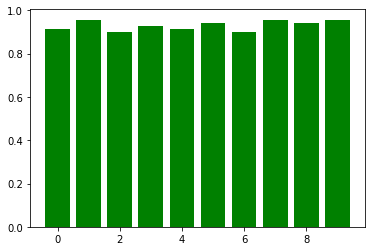

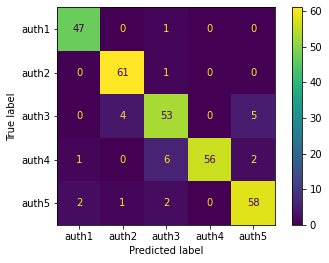

MultinomialNB()

In [23]:
#apply Multinom_NB on  pow
x_train,x_test,y_train,y_test = split_data(X_train_counts,df['book_name'])
Multinom_NB(x_train,x_test,y_train,y_test)

the cross_validation result is 0.8514285714285714
the accuracy is0.8566666666666667


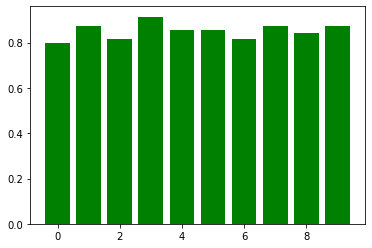

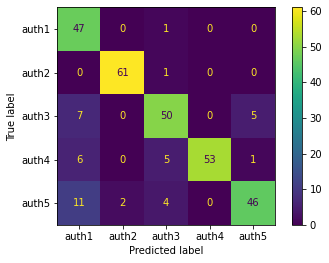

MultinomialNB()

In [24]:
#apply Multinom_NB on  tf-idf
x_train,x_test,y_train,y_test = split_data(X_train_tf,df['book_name'])
Multinom_NB(x_train,x_test,y_train,y_test)

the cross_validation result is 0.8700000000000001
the accuracy is0.8733333333333333


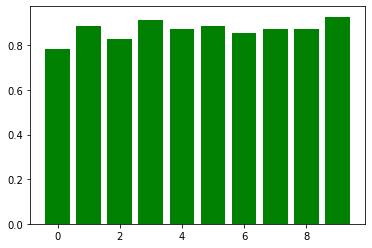

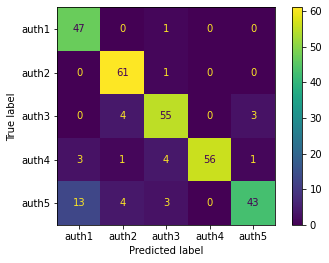

MultinomialNB()

In [25]:
#apply Multinom_NB on  n_gram
x_train,x_test,y_train,y_test = split_data(x_train_ngram,df['book_name'])
Multinom_NB(x_train,x_test,y_train,y_test)

the cross_validation result is 0.9085714285714286
the accuracy is0.9


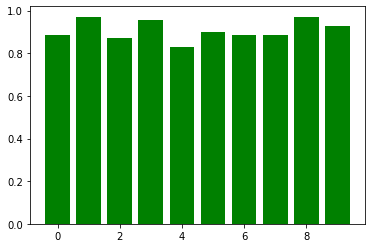

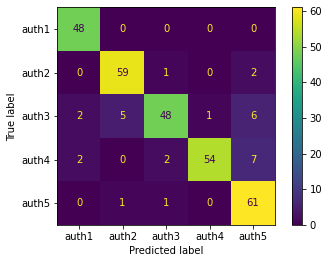

SVC(C=50)

In [26]:
#apply svm on  pow
x_train,x_test,y_train,y_test = split_data(X_train_counts,df['book_name'])
SVM(x_train,x_test,y_train,y_test)

the cross_validation result is 0.9071428571428571
the accuracy is0.8966666666666666


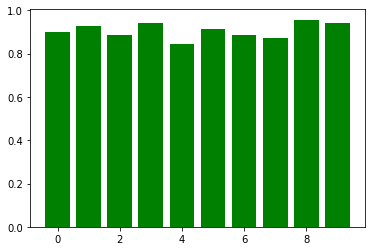

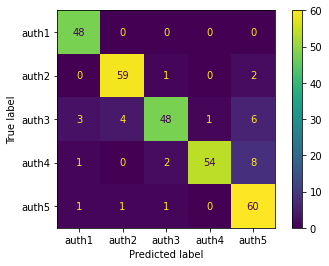

SVC(C=50)

In [27]:
#apply svm on  tf-idf
x_train,x_test,y_train,y_test = split_data(X_train_tf,df['book_name'])
SVM(x_train,x_test,y_train,y_test)

In [ ]:
# #apply svm on  n_gram
# x_train,x_test,y_train,y_test = split_data(x_train_ngram,df['book_name'])
# SVM(x_train,x_test,y_train,y_test)

the cross_validation result is 0.7085714285714285
the accuracy is0.7166666666666667


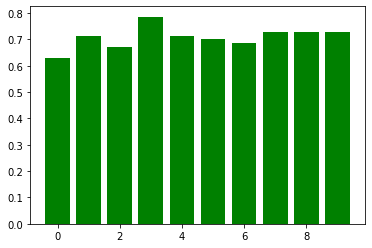

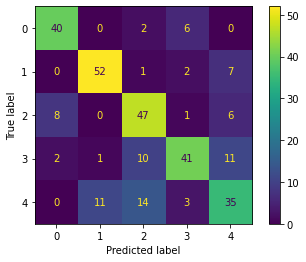

SVC(C=50)

In [70]:
#apply svm on  LDA
x_train,x_test,y_train,y_test = split_data(lda_x, lda_y)
SVM(x_train,x_test,y_train,y_test)

the cross_validation result is 0.8485714285714285
the accuracy is0.84


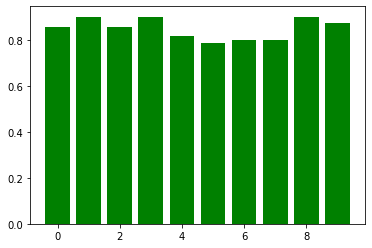

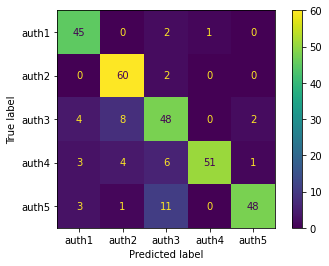

KNeighborsClassifier()

In [29]:
#apply KNeighborsClassifier on  pow
x_train,x_test,y_train,y_test = split_data(X_train_counts,df['book_name'])
kneighborsClassifier(x_train,x_test,y_train,y_test)

the cross_validation result is 0.7928571428571429
the accuracy is0.8033333333333333


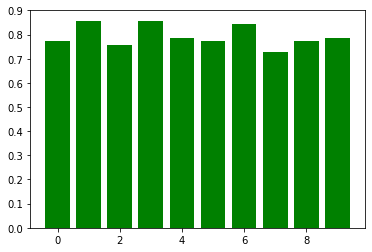

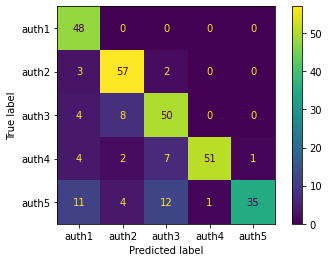

KNeighborsClassifier()

In [30]:
#apply KNeighborsClassifier on  tf-idf
x_train,x_test,y_train,y_test = split_data(X_train_tf,df['book_name'])
kneighborsClassifier(x_train,x_test,y_train,y_test)

the cross_validation result is 0.8557142857142856
the accuracy is0.8433333333333334


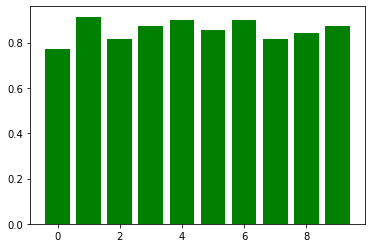

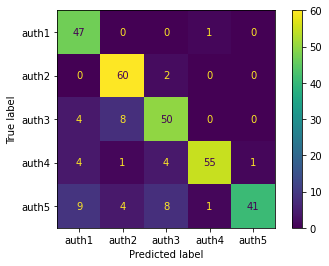

KNeighborsClassifier()

In [31]:
#apply KNeighborsClassifier on  n_gram
x_train,x_test,y_train,y_test = split_data(x_train_ngram,df['book_name'])
kneighborsClassifier(x_train,x_test,y_train,y_test)

the cross_validation result is 0.647142857142857
the accuracy is0.6733333333333333


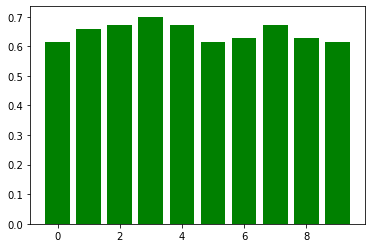

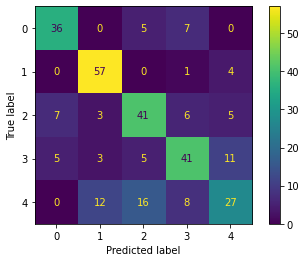

KNeighborsClassifier()

In [71]:
#apply KNeighborsClassifier on  LDA
x_train,x_test,y_train,y_test = split_data(lda_x, lda_y)
kneighborsClassifier(x_train,x_test,y_train,y_test)

the cross_validation result is 0.72
the accuracy is0.7166666666666667


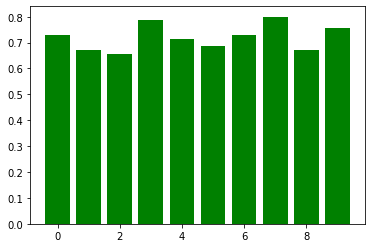

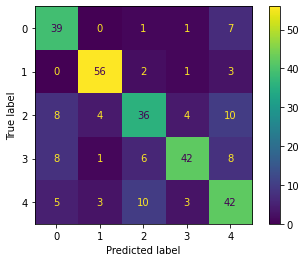

DecisionTreeClassifier()

In [78]:
#apply decesion_tree on  pow
x_train,x_test,y_train,y_test = split_data(X_train_counts,df['book_name'])
model1=Decesion_tree(x_train,x_test,y_train,y_test)
model1

the cross_validation result is 0.6971428571428571
the accuracy is0.6966666666666667


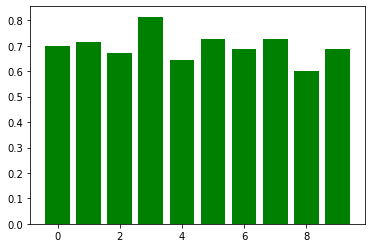

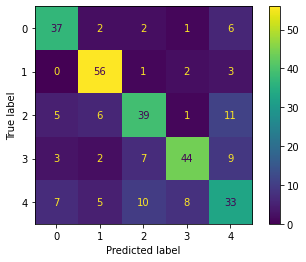

DecisionTreeClassifier()

In [79]:
#apply decesion_tree on  tf-idf
x_train,x_test,y_train,y_test = split_data(X_train_tf,df['book_name'])
model2=Decesion_tree(x_train,x_test,y_train,y_test)
model2

the cross_validation result is 0.6742857142857143
the accuracy is0.72


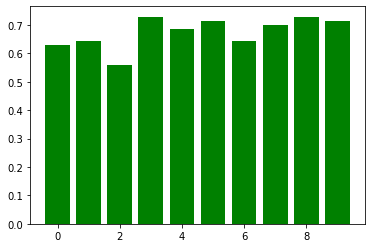

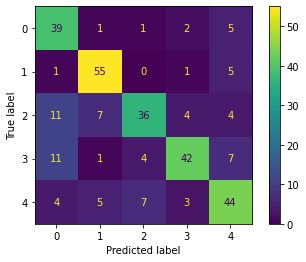

DecisionTreeClassifier()

In [80]:
#apply decesion_tree on  n_gram
x_train,x_test,y_train,y_test = split_data(x_train_ngram,df['book_name'])
model3=Decesion_tree(x_train,x_test,y_train,y_test)
model3

the cross_validation result is 0.6042857142857143
the accuracy is0.6266666666666667


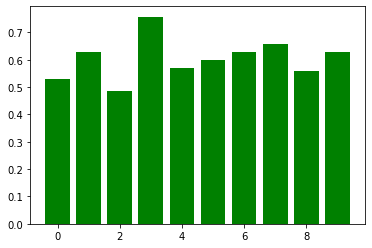

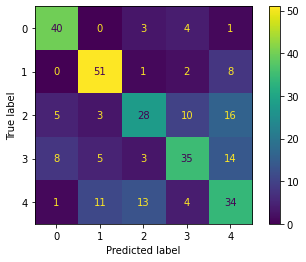

DecisionTreeClassifier()

In [81]:
#apply Decesion_tree  on  LDA
x_train,x_test,y_train,y_test = split_data(lda_x, lda_y)
model4=Decesion_tree(x_train,x_test,y_train,y_test)
model4

#visualization 

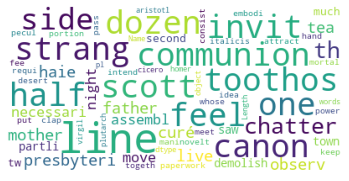

In [73]:
import wordcloud
import matplotlib.pyplot as plt
wc=wordcloud.WordCloud(background_color='white',max_words=100,max_font_size=50)
wc=wc.generate(str(df['words']))
fig=plt.figure(num=1)
plt.axis('off')
plt.imshow(wc,cmap=None)
plt.show()

In [ ]:
plt.figure(figsize=(35,35)) 
fig = tree.plot_tree(model1,class_names=['a','b','c','d','e'],filled=True)
plt.savefig('fig.png')

In [ ]:
text_representation = tree.export_text(model1)
print(text_representation)
plt.savefig('fig.png')
with open("decistion_tree.png", "w") as fout:
    fout.write(text_representation)

In [ ]:
# DOT data
dot_data = tree.export_graphviz(model1, out_file=None,   
                                class_names=['a','b','c','d','e'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.save('image.png')
graph
